In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#loading dataset
dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

df['job_skills']=df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) & pd.notna(skills) else skills)

In [2]:
country='United States'
job='Data Analyst'
df_job_country=df[(df['job_country']==country)& (df['job_title_short']==job)]
df_exploded=df_job_country.explode('job_skills')
df_grouped=df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_top_pay=df_grouped.sort_values(by='median',ascending=False).head(10)
df_top_skill=df_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
# counts the most demand skill then sorts by median salary

Text(0, 0.5, ' ')

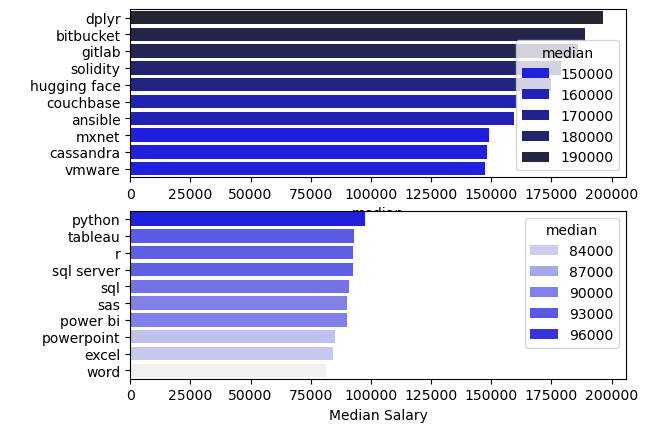

In [16]:
fig,ax=plt.subplots(2,1)
sns.barplot(data=df_top_pay,x='median',y=df_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
sns.barplot(data=df_top_skill,x='median',y=df_top_skill.index,ax=ax[1],hue='median',palette='light:b')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary')
ax[0].set_ylabel(" ")
ax[1].set_ylabel(" ")

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

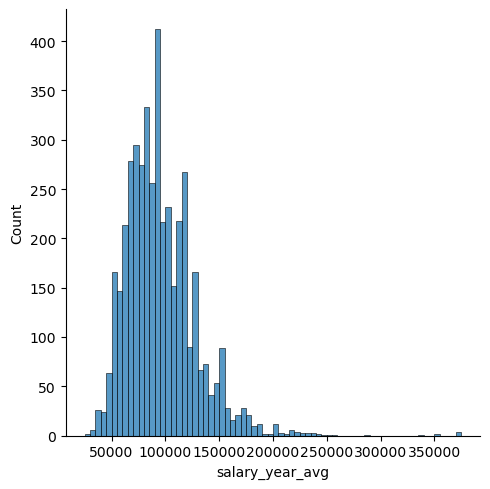

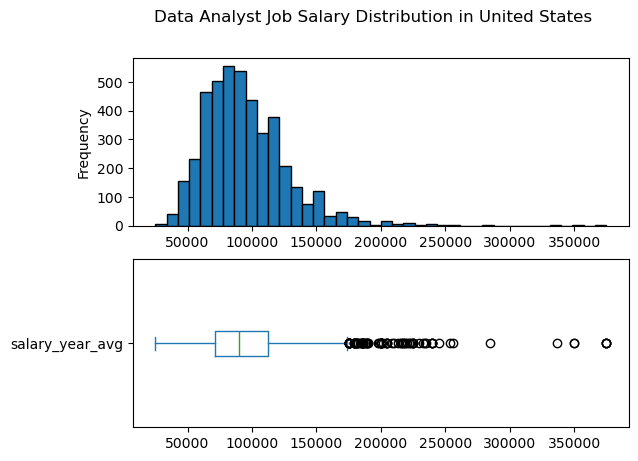

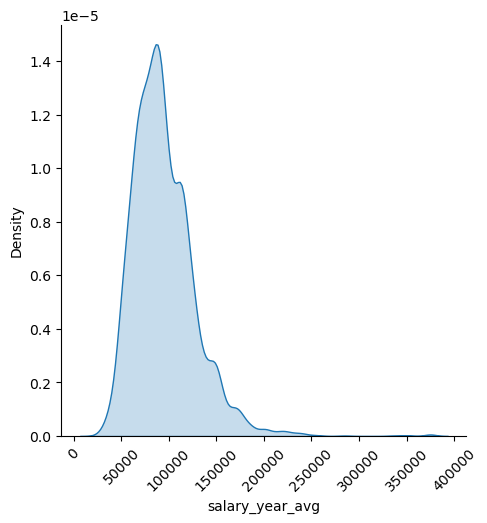

In [21]:
sns.displot(df_job_country['salary_year_avg'])
fig,ax=plt.subplots(2,1)
df_job_country['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black',ax=ax[0])
df_job_country['salary_year_avg'].plot(kind='box', vert=False,ax=ax[1])
plt.suptitle(f'{job} Job Salary Distribution in {country}')
sns.displot(df_job_country['salary_year_avg'],kind='kde',fill=True)
plt.xticks(rotation=45)